In [1]:
import numpy as np
from tifffile import imread
import matplotlib.pyplot as plt
from ome_types import from_tiff

In [2]:
paths = {
    
    'topacio70':('/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/840047_0070.ome.tif', 1000),
    'topacio128':('/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/840153_0128.ome.tif', 600),
    'sardana':('/Volumes/T7 Shield/cylinter_input/sardana-097/tif/WD-76845-097.ome.tif', 1000),
    'LI_codex1':('/Users/greg/Desktop/HBM946.GRVG.379/tif/HBM946.GRVG.379.ome.tif', 200),
    'LI_codex2':('/Users/greg/Desktop/HBM524.VWGB.378/tif/HBM524.VWGB.378.ome.tif', 100),
    'HNSCC_codex1':('/Volumes/My Book/cylinter_input/CODEX/tif/sample_1.ome.tif', 200),
    'HNSCC_codex2':('/Volumes/My Book/cylinter_input/CODEX/tif/sample_2.ome.tif', 1300),
    'emit':('/Volumes/My Book/T7_overflow/cylinter_input/emit22_full/tif/1.ome.tif', 200),
    'mihc': ('/Volumes/My Book/cylinter_input/mIHC/tif/sample_1.ome.tif', 30),
}

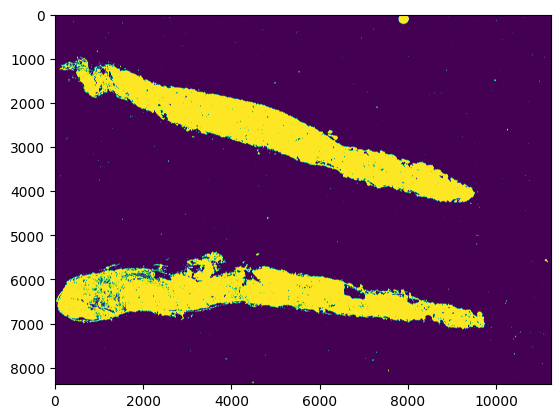

Pixel size of topacio70 is 0.65 with an estimated area of 13759371 sq. pixels
Full image dimensions are (8377, 11239) pixels


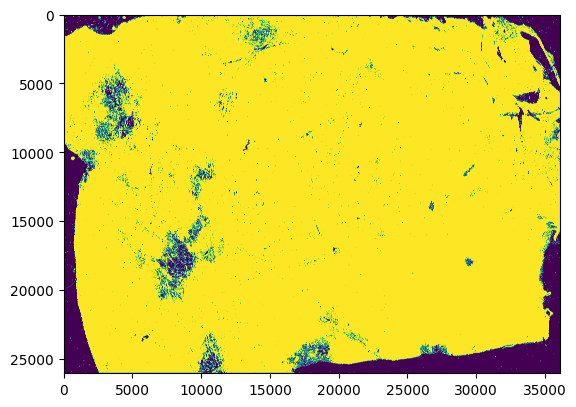

Pixel size of topacio128 is 0.65 with an estimated area of 843117841 sq. pixels
Full image dimensions are (26068, 36060) pixels


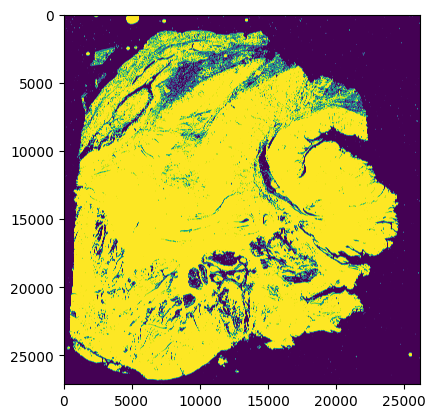

Pixel size of sardana is 0.65 with an estimated area of 407938809 sq. pixels
Full image dimensions are (27120, 26139) pixels


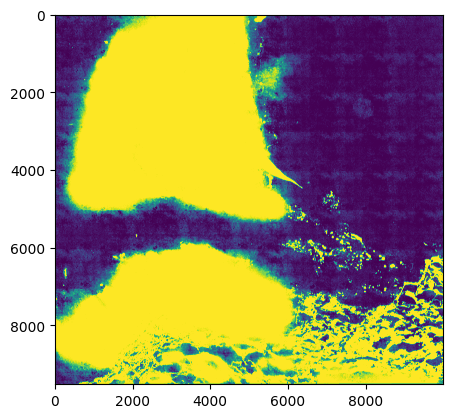

Pixel size of LI_codex1 is 0.38 with an estimated area of 51495415 sq. pixels
Full image dimensions are (9515, 9995) pixels


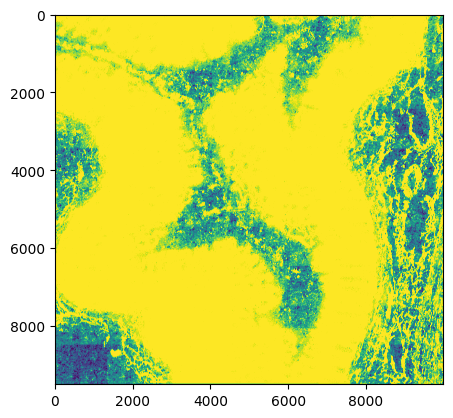

Pixel size of LI_codex2 is 0.38 with an estimated area of 83727055 sq. pixels
Full image dimensions are (9505, 9989) pixels


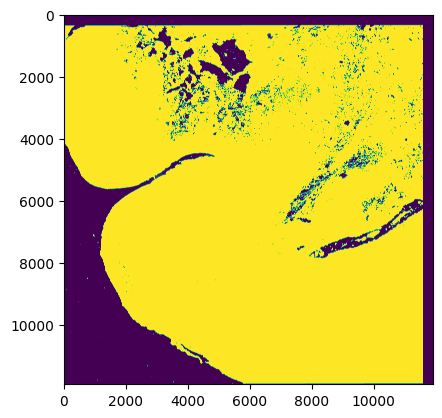

Pixel size of HNSCC_codex1 is 0.65 with an estimated area of 112253249 sq. pixels
Full image dimensions are (11916, 11900) pixels


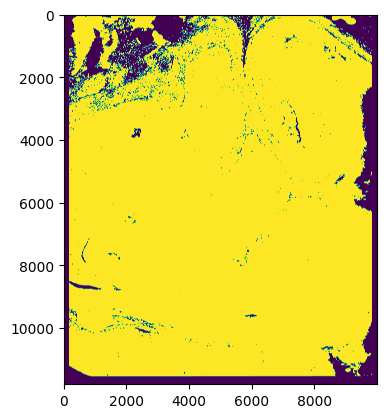

Pixel size of HNSCC_codex2 is 0.65 with an estimated area of 102727825 sq. pixels
Full image dimensions are (11800, 10000) pixels


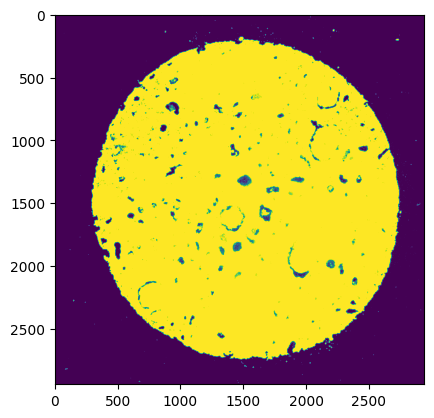

Pixel size of emit is 0.65 with an estimated area of 4763349 sq. pixels
Full image dimensions are (2943, 2943) pixels


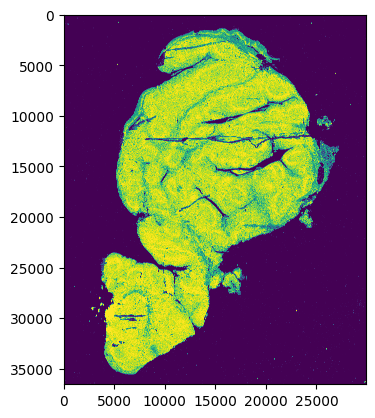

Pixel size of mihc is 0.5 with an estimated area of 366113803 sq. pixels
Full image dimensions are (36539, 29879) pixels


In [3]:
for name, data in paths.items():
    path = data[0]
    cutoff = data[1]
    ome = from_tiff(path)
    im = imread(path, key=0)
    binary = (im > cutoff).astype(int)
    plt.imshow(binary)
    plt.show()
    pixel_size = round(ome.images[0].pixels.physical_size_x, 2)
    if name in ['LI_codex1', 'LI_codex2']:
        pixel_size = 0.38
    elif name == 'mihc':
        pixel_size = 0.5
    count_ones = np.count_nonzero(binary == 1)
    print(
        f'Pixel size of {name} is {pixel_size} with an estimated area of {count_ones} sq. pixels'
    )
    print(f'Full image dimensions are {im.shape} pixels')